# MNIST: Classification of the symbol 'five'

In [1]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')

In [2]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [3]:
X, y = mnist['data'], mnist['target']

In [4]:
def show_digit(index):
    digit = X[index]
    digit_img = digit.reshape(28, 28)
    plt.imshow(digit_img, cmap=matplotlib.cm.binary, interpolation='nearest')
    plt.axis('off')
    plt.show()

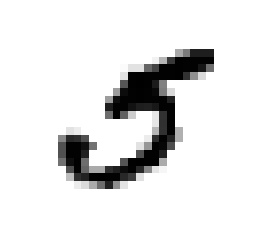

In [5]:
show_digit(36000)

In [6]:
# Split up dataset in test and training data
X_train, y_train, X_test, y_test = X[:60000], y[:60000], X[60000:], y[60000:]
# and shuffle training data
shuffle_index = np.random.permutation(60000)
X_train, y_train = X[shuffle_index], y_train[shuffle_index]

In [7]:
# Filter out non-fives
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [19]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

/Users/espe/Documents/Projekte/MachineLearning/env/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [24]:
# Predict the five above
sgd_clf.predict([X[36000]])
# And validate the model
from sklearn.model_selection import cross_val_score
y_train_accuracy = cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')
# and use a confusion matrix
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method='decision_function')
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

/Users/espe/Documents/Projekte/MachineLearning/env/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users/espe/Documents/Projekte/MachineLearning/env/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will

array([[54062,   517],
       [ 2301,  3120]])

In [25]:
from sklearn.metrics import precision_score, recall_score, f1_score
print('SGDClassifier accuracy:', y_train_accuracy)
print('SGDClassifier precision:', precision_score(y_train_5, y_train_pred))
print('SGDClassifier recall:', recall_score(y_train_5, y_train_pred))
print('SGDClassifier F1:', f1_score(y_train_5, y_train_pred))

SGDClassifier accuracy: [ 0.9645  0.9403  0.9543]
SGDClassifier precision: 0.857849876272
SGDClassifier recall: 0.575539568345
SGDClassifier F1: 0.68889379554


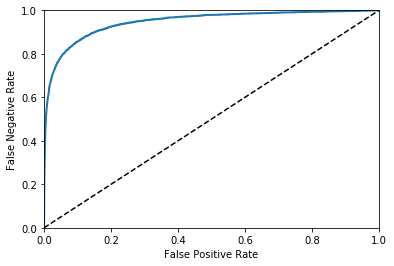

In [27]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('False Negative Rate')
plot_roc_curve(fpr, tpr)
plt.show()

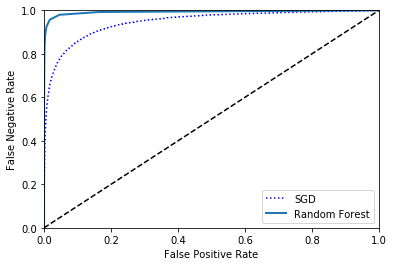

In [32]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method='predict_proba')
y_scores_forest = y_probas_forest[:, 1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)
plt.plot(fpr, tpr, 'b:', label='SGD')
plot_roc_curve(fpr_forest, tpr_forest, 'Random Forest')
plt.legend(loc='lower right')
plt.show()

In [30]:
roc_auc_score(y_train_5, y_scores_forest)

0.99265818351327173

In [34]:
print('RandomForestClassifier precision:', precision_score(y_train_5, y_train_pred_forest))
print('RandomForestClassifier recall:', recall_score(y_train_5, y_train_pred_forest))

RandomForestClassifier precision: 0.982969432314
RandomForestClassifier recall: 0.830474082273
